<a href="https://colab.research.google.com/github/Haniaakanwal/DIP-TASK/blob/main/DIP_Task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Check Python version
import sys
print(sys.version)


3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]


In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy.stats import mode


In [ ]:
from google.colab import files

uploaded = files.upload()


Saving noise-img.jpg to noise-img.jpg


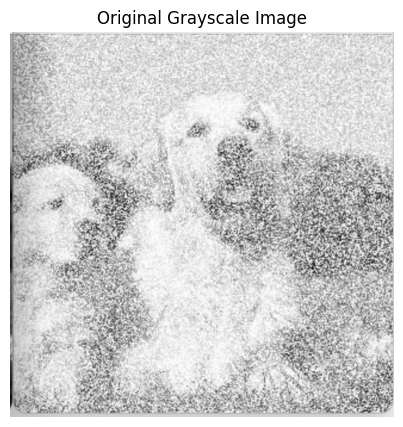

In [ ]:
# Replace filename with your uploaded image name
image_path = list(uploaded.keys())[0]

image = Image.open(image_path).convert("L")  # Convert to grayscale
image_array = np.array(image)

# Display original image
plt.figure(figsize=(5,5))
plt.imshow(image_array, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis("off")
plt.show()


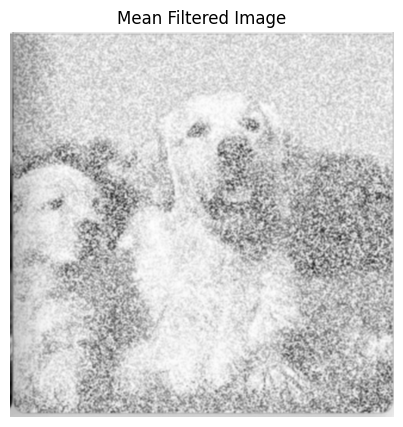

In [ ]:
mean_filtered = ndimage.uniform_filter(image_array, size=3)

plt.figure(figsize=(5,5))
plt.imshow(mean_filtered, cmap='gray')
plt.title("Mean Filtered Image")
plt.axis("off")
plt.show()


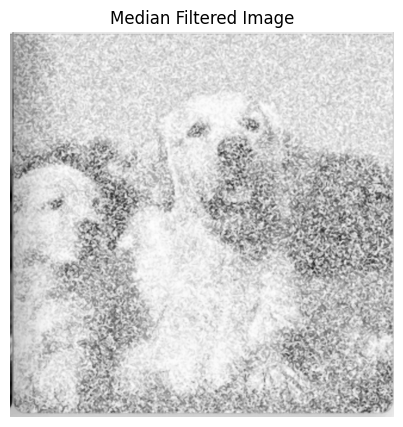

In [ ]:
median_filtered = ndimage.median_filter(image_array, size=3)

plt.figure(figsize=(5,5))
plt.imshow(median_filtered, cmap='gray')
plt.title("Median Filtered Image")
plt.axis("off")
plt.show()


/tmp/ipython-input-2259218682.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  filtered[i, j] = mode(window.flatten(), keepdims=True)[0]


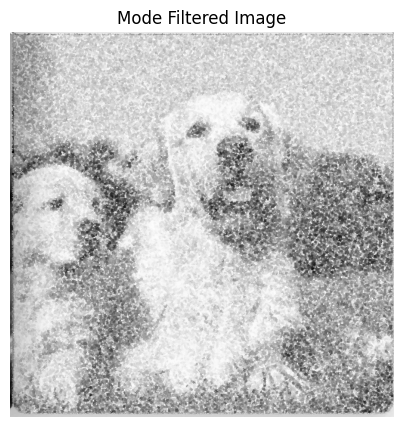

In [ ]:
def mode_filter(img, size=3):
    filtered = np.zeros_like(img)
    pad = size // 2
    padded_img = np.pad(img, pad, mode='edge')

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            window = padded_img[i:i+size, j:j+size]
            filtered[i, j] = mode(window.flatten(), keepdims=True)[0]
    return filtered

mode_filtered = mode_filter(image_array, size=3)

plt.figure(figsize=(5,5))
plt.imshow(mode_filtered, cmap='gray')
plt.title("Mode Filtered Image")
plt.axis("off")
plt.show()


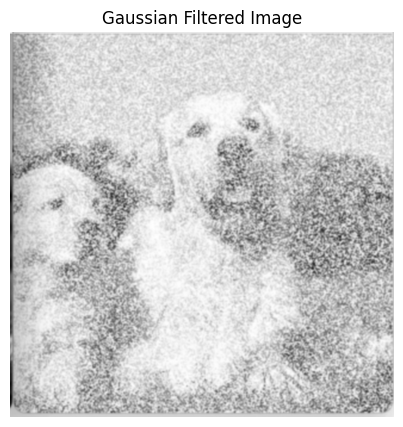

In [ ]:
gaussian_filtered = ndimage.gaussian_filter(image_array, sigma=1)

plt.figure(figsize=(5,5))
plt.imshow(gaussian_filtered, cmap='gray')
plt.title("Gaussian Filtered Image")
plt.axis("off")
plt.show()


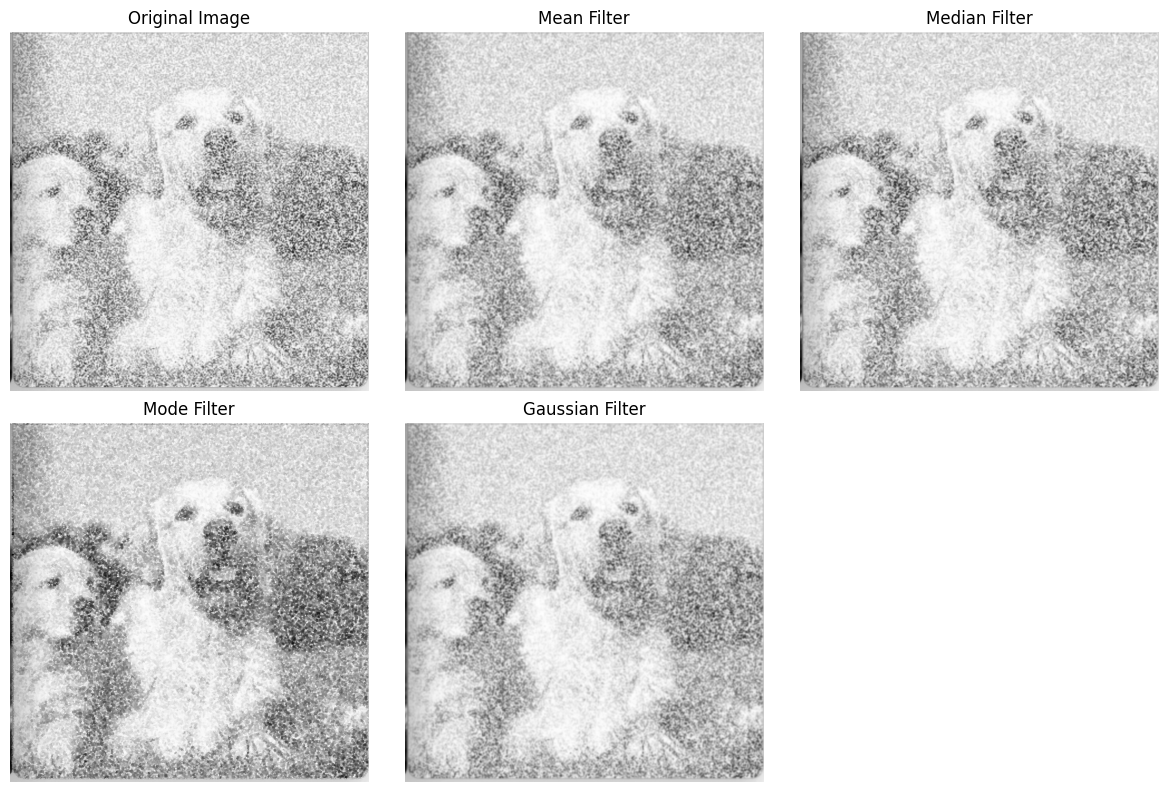

In [ ]:
plt.figure(figsize=(12,8))

plt.subplot(2,3,1)
plt.imshow(image_array, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(2,3,2)
plt.imshow(mean_filtered, cmap='gray')
plt.title("Mean Filter")
plt.axis("off")

plt.subplot(2,3,3)
plt.imshow(median_filtered, cmap='gray')
plt.title("Median Filter")
plt.axis("off")

plt.subplot(2,3,4)
plt.imshow(mode_filtered, cmap='gray')
plt.title("Mode Filter")
plt.axis("off")

plt.subplot(2,3,5)
plt.imshow(gaussian_filtered, cmap='gray')
plt.title("Gaussian Filter")
plt.axis("off")

plt.tight_layout()
plt.show()
